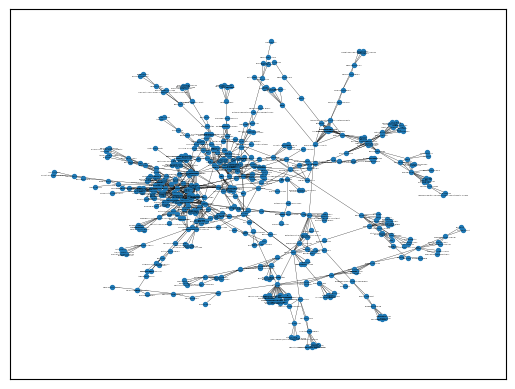

In [111]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

with open('/Users/lindseyhill/Documents/GitHub/BMME590-2024/data/stan.diseasome.edgelist.txt', mode = 'rb') as file:
   G = nx.read_edgelist(file)

with open('/Users/lindseyhill/Documents/GitHub/BMME590-2024/data/stan.disease.labels.txt', mode = 'r') as file:
    csvFile = csv.reader(file)
    csvLabels = []
    csvData = {}
    for csvLines in csvFile:
        csvLabels.append(csvLines[1])
        csvData[csvLines[0]] = csvLines[1]
    csvLabels.pop(0)

pos=nx.spring_layout(G) 
labels = {} 
for idx, node in enumerate(G.nodes()): 
    labels[node] = csvLabels[idx]
 
nx.draw_networkx_nodes(G, pos, node_size = 8) 
nx.draw_networkx_edges(G, pos, width= 0.2) 
nx.draw_networkx_labels(G, pos, labels, font_size=1)

#plt.savefig("Graph.png", format="PNG", dpi = 1500) 
plt.show()

This network represents connections between human diseases.  The connections are determined by genes that lead to disease cause. 

largest_cc = max(nx.connected_components(G)) 
#print("Number of nodes in the largest connected component: ", len(largest_cc))
#print("Number of nodes in the original graph: ", len(G))
if len(largest_cc) == len(G):
    print('The largest connected component is the same size as the original graph.')
else:
    print('The largest connected component is smaller than the original graph.')


In [14]:
N = len(G)
L = G.number_of_edges()
G2 = nx.gnm_random_graph(N,L)

In [25]:
degs = [d for n, d in G.degree()]
G3 = nx.configuration_model(degs)

MultiGraph with 516 nodes and 1188 edges


In [32]:
# Mean Degree
import statistics
meandeg = statistics.mean(degs)
print('The mean degree of the original graph is ',meandeg)
degs2 = [d for n, d in G2.degree()]
meandeg2 = statistics.mean(degs2)
print('The mean degree of the first random graph is ',meandeg2)
degs3 = [d for n, d in G3.degree()]
meandeg3 = statistics.mean(degs3)
print('The mean degree of the second random graph is ',meandeg)

The mean degree of the original graph is  4.604651162790698
The mean degree of the first random graph is  4.604651162790698
The mean degree of the second random graph is  4.604651162790698


Number of Components:
Original - 1
Random 1 - 6
Random 2 - 3

In [33]:
# Degree Distribution
print("Degree distribution of original graph:",nx.degree_histogram(G))
print("Degree distribution of first random graph:",nx.degree_histogram(G2))
print("Degree distribution of second random graph:",nx.degree_histogram(G3))

Degree distribution of original graph: [0, 90, 102, 65, 69, 54, 27, 24, 26, 20, 8, 7, 2, 1, 5, 4, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Degree distribution of first random graph: [5, 18, 55, 86, 98, 98, 61, 56, 18, 11, 3, 7]
Degree distribution of second random graph: [0, 90, 102, 65, 69, 54, 27, 24, 26, 20, 8, 7, 2, 1, 5, 4, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


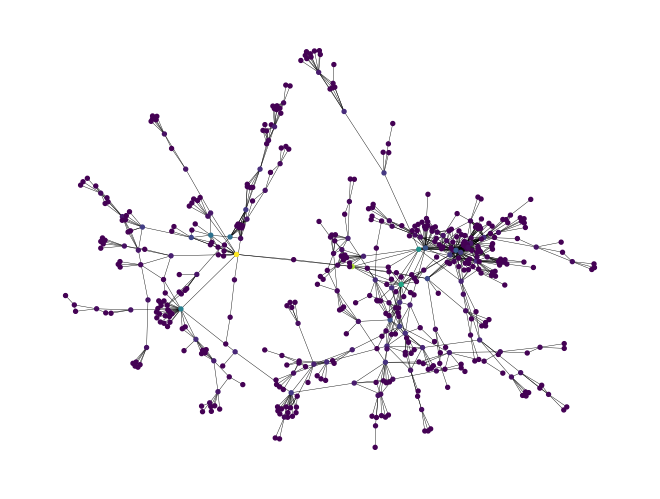

In [59]:
# Betweeness Original Graph
var = nx.betweenness_centrality(G)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G,node_color = vals,node_size = 8, width = 0.3 )

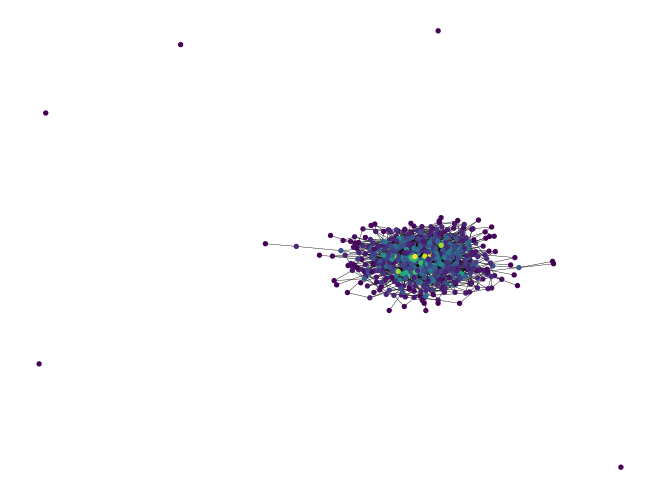

In [60]:
# Betweeness Random Graph 1
var = nx.betweenness_centrality(G2)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G2,node_color = vals,node_size = 8, width = 0.3 )

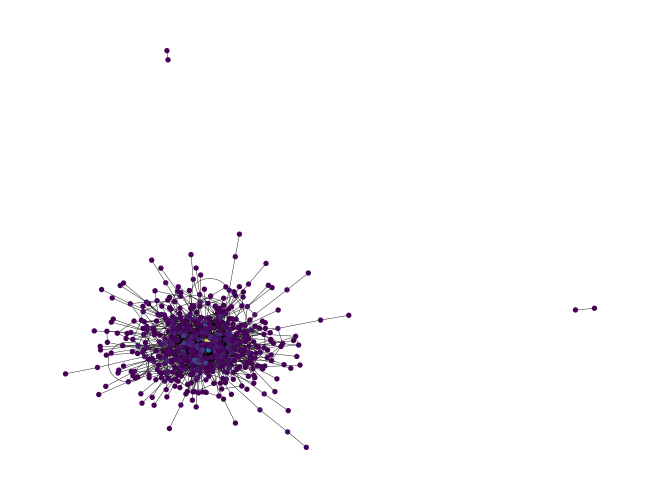

In [61]:
# Betweeness Random Graph 2
var = nx.betweenness_centrality(G3)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G3,node_color = vals,node_size = 8, width = 0.3 )

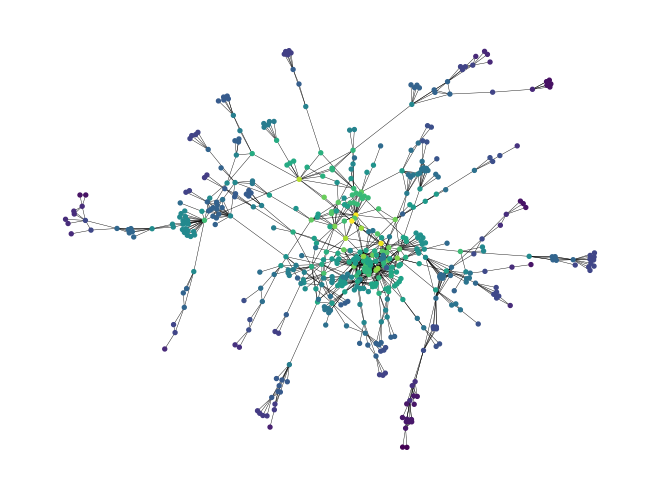

In [62]:
# Closeness Original Graph
var = nx.closeness_centrality(G)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G,node_color = vals,node_size = 8, width = 0.3 )

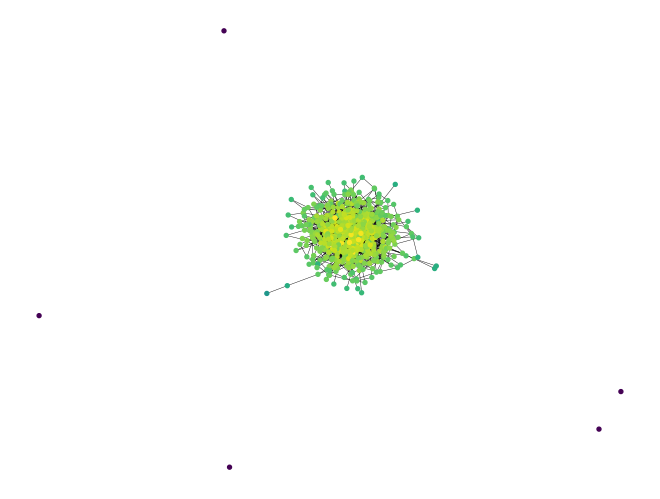

In [63]:
# Closeness Random Graph 1
var = nx.closeness_centrality(G2)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G2,node_color = vals,node_size = 8, width = 0.3 )

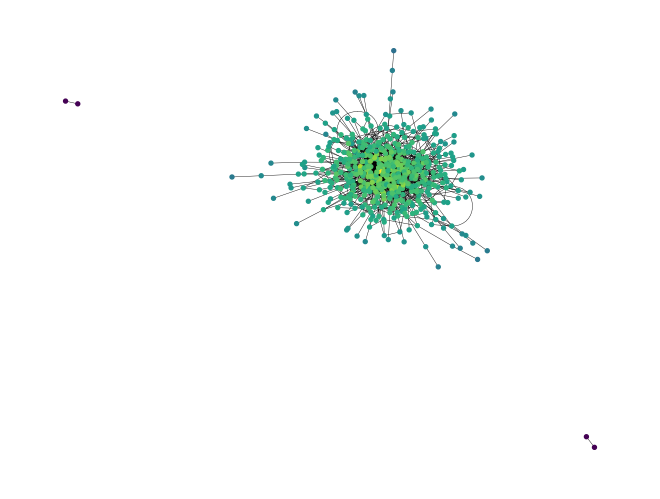

In [64]:
# Closeness Random Graph 2
var = nx.closeness_centrality(G3)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G3,node_color = vals,node_size = 8, width = 0.3 )

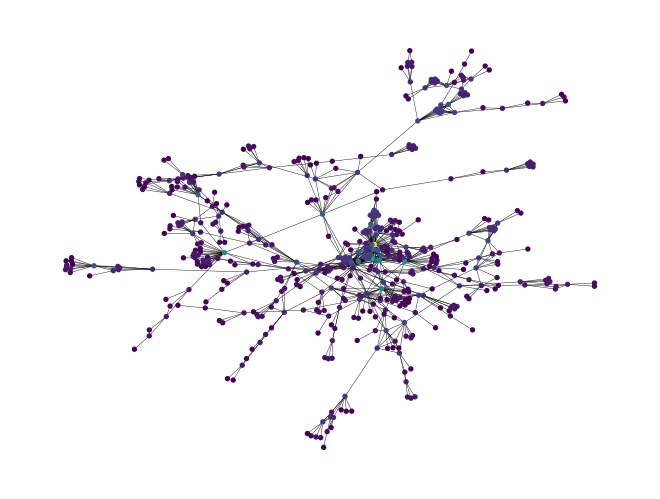

In [65]:
# Degree Centrality Original Graph
var = nx.degree_centrality(G)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G,node_color = vals,node_size = 8, width = 0.3 )

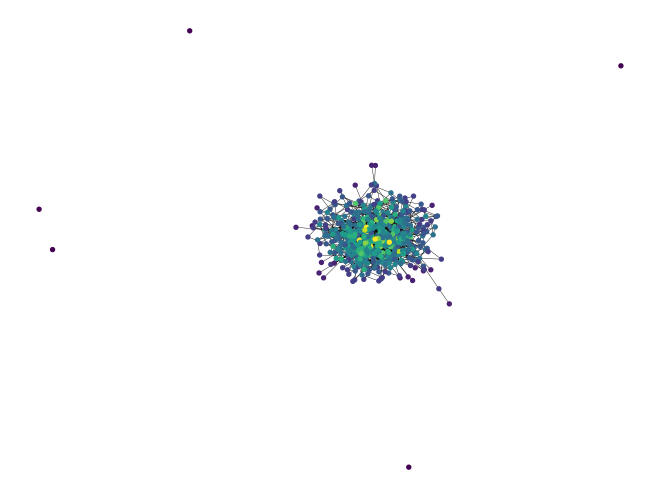

In [66]:
# Degree Centrality Random Graph 1
var = nx.degree_centrality(G2)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G2,node_color = vals,node_size = 8, width = 0.3 )

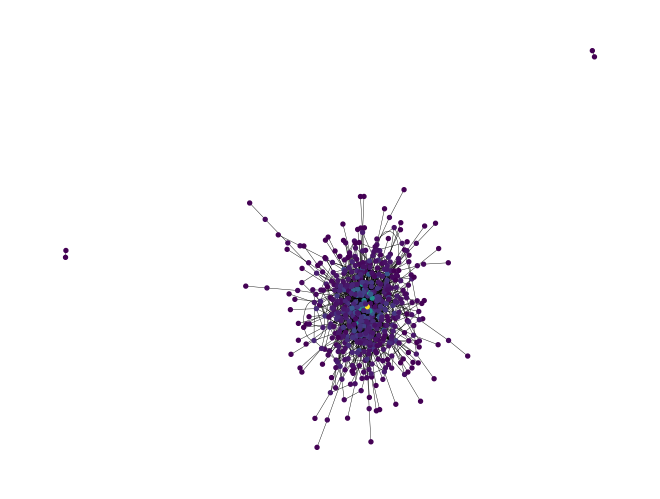

In [67]:
# Degree Centrality Random Graph 2
var = nx.degree_centrality(G3)
vals = []
for key, value in var.items():
    vals.append([value])
nx.draw(G3,node_color = vals,node_size = 8, width = 0.3 )

In [135]:
# Rankings
bet = nx.betweenness_centrality(G)
degc = nx.degree_centrality(G)

bet = {k: v for k, v in sorted(bet.items(), key = lambda item: item[1], reverse = True)}
degc = {k: v for k, v in sorted(degc.items(), key = lambda item: item[1], reverse = True)}
betKeys = [key for key in bet.keys()]
degcKeys = [key for key in degc.keys()]
bet10 = {betKeys[idx]: bet.get(betKeys[idx]) for idx in range(len(betKeys)) if idx < 10}
degc10 = {degcKeys[idx]: degc.get(degcKeys[idx]) for idx in range(len(degcKeys)) if idx < 10}
bet10key = [key for key in bet10.keys()]
bet10diseases = [csvData.get(key) for key in bet10key]
degc10key = [key for key in degc10.keys()]
degc10diseases = [csvData.get(key) for key in degc10key]

mydata = [(a, b) for a, b in zip(bet10diseases, degc10diseases)]

from prettytable import PrettyTable
mytable = PrettyTable(['Top 10 Betweenness','Top 10 Degree Centrality'])

for n in range(10):
    mytable.add_row(mydata[n])

print(mytable)

+--------------------+--------------------------+
| Top 10 Betweenness | Top 10 Degree Centrality |
+--------------------+--------------------------+
|   Cardiomyopathy   |       Colon cancer       |
|   Lipodystrophy    |      Breast cancer       |
| Diabetes mellitus  |      Gastric cancer      |
|    Glioblastoma    |         Leukemia         |
|      Deafness      |    Thyroid carcinoma     |
|      Myopathy      |         Deafness         |
|      Cataract      |    Diabetes mellitus     |
|    Colon cancer    |    Pancreatic cancer     |
|      Leukemia      |     Prostate cancer      |
| Alzheimer disease  |      Ovarian cancer      |
+--------------------+--------------------------+


There is not much overlap between the two lists.  There is only one disease (Diabetes mellitus) in the top 10 betweenness that appears in the degree centrality list, at number 6.  This shows that the most connected diseases don't necessarily occur most frequently.

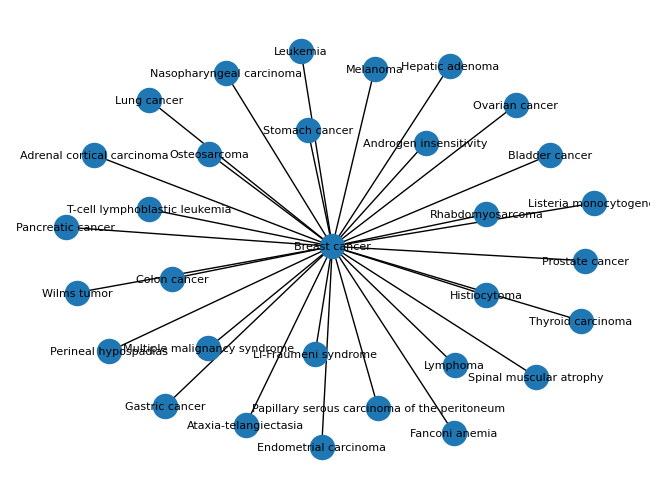

In [167]:
nodes = [x for x in G.neighbors("137")]
nodes.append('137')
edges = [(n1,'137') for n1 in  G.neighbors("137")]
labels = {key: csvData.get(key) for key in nodes}

G4 = nx.from_edgelist(edges)
pos = nx.spring_layout(G4)

nx.draw(G4,pos, with_labels=True, labels=labels,font_size = 8)



Most of the neighbors for breast cancer are other types of cancers, which makes sense that they would share disease genes.  